# 11과 [예제] 숫자 vs 범주

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

* 데이터 불러오기


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://bit.ly/3HaMAtZ')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family,Age_scale1
0,0,3,male,22.0,1,0,7.2500,S,Age21_30,2,0.271174
1,1,1,female,38.0,1,0,71.2833,C,Age31_40,2,0.472229
2,1,3,female,26.0,0,0,7.9250,S,Age21_30,1,0.321438
3,1,1,female,35.0,1,0,53.1000,S,Age31_40,2,0.434531
4,0,3,male,35.0,0,0,8.0500,S,Age31_40,1,0.434531


## 2.시각화

* 히스토그램을 Survived로 나눠서 그려봅시다.

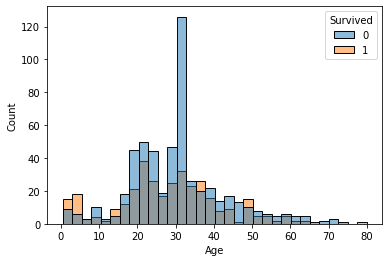

In [17]:
# hue = 'Survived' : Survived 별로
sns.histplot(x='Age', data = titanic, hue = 'Survived', bins = 32)
plt.show()

* densityplot을 Survived로 나눠서 그려봅시다.  
kdeplot(   , hue = 'Survived, common_norm = False) 
    * hue : 생존여부 별로 나눠서 그리기
    * common_norm = False : 두 그래프 각각 아래 면적의 합이 1

- common_norm=True  
→ 두 그래프를 합친 면적 = 1

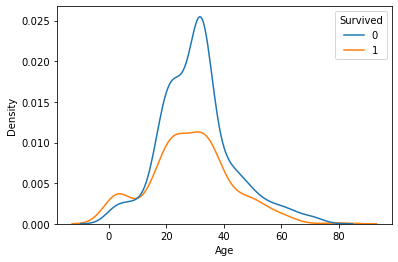

In [5]:
sns.kdeplot(x='Age', data = titanic, hue = 'Survived', 
            common_norm=True)
plt.show()

- common_norm=False  
→ 각 그래프를 면적 = 1

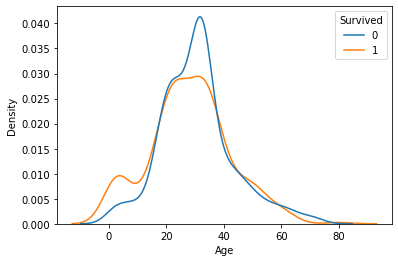

In [4]:
sns.kdeplot(x='Age', data = titanic, hue = 'Survived', 
            common_norm=False)
plt.show()

### 연습

* Fare --> Survived : 히스토그램과 밀도함수 그래프로 시각화 해 봅시다.

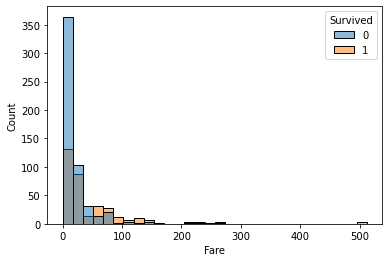

In [11]:
# Fare --> Survived : 히스토그램
sns.histplot(x='Fare', data= titanic, hue = 'Survived',
            bins = 30)
plt.show()

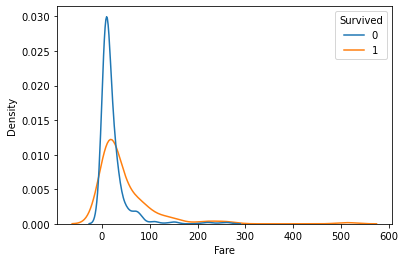

In [10]:
# Fare --> Survived : 밀도함수 그래프

sns.kdeplot(x='Fare', data = titanic, hue = 'Survived',
           common_norm = False)
plt.show()

## 3.수치화 : 로지스틱 회귀 모델로 부터 p value 구하기

숫자 --> 범주에 대해 딱 맞는 가설검정 도구가 없으므로, 로지스틱 회귀 모델로 부터 p-value를 구해봅시다.

In [14]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.

# sm.Logit(y, x)
model = sm.Logit(titanic['Survived'], titanic['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.661967
         Iterations 4
Age    3.932980e-13
dtype: float64


→ p-value가 0.05보다 작기 때문에, Age에 따라 생존여부가 달라지는 것과 관련이 있네

### 연습

* Fare --> Survived : 로지스틱회귀로 부터 p-value를 구해 봅시다.

In [16]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.

# sm.Logit(y, x)
model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64
